In [1]:
import warnings
warnings.filterwarnings("ignore")

import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


import json
import csv
import pandas as pd
import numpy as np

import networkx as nx

%matplotlib inline

In [2]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.size'] = 20
rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.figsize'] = (20, 15)
rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

navy = (56 / 256, 74 / 256, 143 / 256)
teal = (106 / 256, 197 / 256, 179 / 256)
pink = [199 / 255, 99 / 255, 150 / 255]
rcParams['axes.prop_cycle'] = cycler(color=[teal, navy, pink])

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

# Activity rate analysis

In [3]:
# Load the JSON file into a DataFrame
with open('data/out/filtered_tweets_2.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)  



In [4]:
# Load the JSON file into a DataFrame
with open('data/out/filtered_tweets_2.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)  # Transpose to set tweets as rows

df


,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,geo
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,[1610294585242300416],"{'annotations': [{'end': 6, 'normalized_text':...",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864...",New ABB E-mobility home charging solution help...,abbgroupnews,NaN
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,[1612750467859378178],"{'annotations': [{'end': 2, 'normalized_text':...",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887...",ABB #technology to facilitate #energyefficienc...,abbgroupnews,NaN
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,[1613113765595320321],"{'annotations': [{'end': 51, 'normalized_text'...",1613113765595320321,en,"{'bookmark_count': 0, 'impression_count': 2559...",Better decisions for a greener data center! Ho...,abbgroupnews,NaN
3,{'media_keys': ['3_1613462741569736704']},51801586,2023-01-12T09:09:45.000Z,[1613463229665271809],"{'annotations': [{'end': 19, 'normalized_text'...",1613463229665271809,en,"{'bookmark_count': 0, 'impression_count': 2087...",ABB Formula E Season 9 goes green in Mexico!\n...,abbgroupnews,NaN
4,{'media_keys': ['13_1613831618141261825']},51801586,2023-01-13T09:41:43.000Z,[1613833662625353729],"{'annotations': [{'end': 7, 'normalized_text':...",1613833662625353729,en,"{'bookmark_count': 0, 'impression_count': 1975...",The #ABB Decoded #podcast with Frank Muehlon i...,abbgroupnews,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6125,{'media_keys': ['3_1734966670068690949']},156646851,2023-12-13T16:03:45.000Z,[1734967350619701374],"{'annotations': [{'end': 62, 'normalized_text'...",1734967350619701374,en,"{'bookmark_count': 1, 'impression_count': 2549...",🌎: 2023 was the hottest year in recorded histo...,vestas,NaN
6126,{'media_keys': ['3_1737133536577015808']},156646851,2023-12-19T15:32:30.000Z,[1737133815452074094],"{'annotations': [{'end': 61, 'normalized_text'...",1737133815452074094,en,"{'bookmark_count': 1, 'impression_count': 1905...","🇪🇺: To deliver clean, affordable, and secure e...",vestas,NaN
6127,{'media_keys': ['3_1737491113206800384']},156646851,2023-12-20T15:13:16.000Z,[1737491360804938169],"{'annotations': [{'end': 160, 'normalized_text...",1737491360804938169,en,"{'bookmark_count': 1, 'impression_count': 4680...",🌎 /🇬🇧 : In the making: one of the largest offs...,vestas,NaN
6128,NaN,156646851,2023-12-22T11:16:00.000Z,[1738156427468763517],"{'annotations': [{'end': 59, 'normalized_text'...",1738156427468763517,en,"{'bookmark_count': 0, 'impression_count': 992,...",🌎/🇬🇧: Partnering with @RWE_AG to take the Nor...,vestas,NaN


In [9]:
metrics = set()
count = 0
for index, row in df.iterrows():    
    public_metrics = row['public_metrics']
    if type(public_metrics) == dict:
        count += 1
        for key, value in public_metrics.items():
            metrics.add(key)
for col in metrics:
    df[col] = np.nan
print(f'valid rows = {count}')
print(metrics)
for index, row in df.iterrows():
    public_metrics = row['public_metrics']     
    for key, value in public_metrics.items():
        # Check if column with key name already exists
        if key in df.columns:
            # Update existing column value
            df.at[index, key] = value
            
metrics = set()
count = 0
for index, row in df.iterrows():    
    attachments = row['attachments']
    if type(attachments) == dict:
        count += 1
        for key, value in attachments.items():
            metrics.add(key)
for col in metrics:
    df[col] = np.nan
print(f'valid rows = {count}')
print(metrics)
for index, row in df.iterrows():
    attachments = row['attachments']     
    if type(attachments) == dict:
        for key, value in attachments.items():
            # Check if column with key name already exists
            if key in df.columns:
                # Update existing column value
                df.at[index, key] = value
            
metrics = set()
count = 0
for index, row in df.iterrows():    
    entities = row['entities']
    if type(entities) == dict:
        count += 1
        for key, value in entities.items():
            metrics.add(key)
for col in metrics:
    df[col] = np.nan
print(df.columns)
print(f'valid rows = {count}')
print(metrics)
for index, row in df.iterrows():
    print(index)
    entities = row['entities'] 
    print(entities)   
    if type(entities) == dict:
        for key, value in entities.items():
            # Check if column with key name already exists
            if key in df.columns:
                # Update existing column value
                df.at[index, key] = value

valid rows = 6130
{'retweet_count', 'impression_count', 'bookmark_count', 'quote_count', 'reply_count', 'like_count'}
valid rows = 3893
{'media_keys', 'media_source_tweet_id', 'poll_ids'}
Index(['attachments', 'author_id', 'created_at', 'edit_history_tweet_ids',
       'entities', 'id', 'lang', 'public_metrics', 'text', 'username', 'geo',
       'retweet_count', 'impression_count', 'bookmark_count', 'quote_count',
       'reply_count', 'like_count', 'media_keys', 'media_source_tweet_id',
       'poll_ids', 'cashtags', 'annotations', 'hashtags', 'mentions', 'urls'],
      dtype='object')
valid rows = 6032
{'cashtags', 'annotations', 'hashtags', 'mentions', 'urls'}
0
{'annotations': [{'end': 6, 'normalized_text': 'ABB', 'probability': 0.5031, 'start': 4, 'type': 'Other'}, {'end': 137, 'normalized_text': 'ABB', 'probability': 0.563, 'start': 135, 'type': 'Other'}], 'hashtags': [{'end': 138, 'start': 134, 'tag': 'ABB'}, {'end': 156, 'start': 139, 'tag': 'electricvehicles'}, {'end': 167, 's

ValueError: Must have equal len keys and value when setting with an iterable

In [183]:
df.columns

Index(['attachments', 'author_id', 'created_at', 'edit_history_tweet_ids',
       'entities', 'id', 'lang', 'public_metrics', 'text', 'username', 'geo'],
      dtype='object')

In [195]:
metrics = set()
count = 0
for index, row in df.iterrows():    
    annotations = row['annotations']
    if type(annotations) == dict:
        count += 1
        for key, value in annotations.items():
            metrics.add(key)
print(f'valid rows = {count}')
print(metrics)
for index, row in df.iterrows():
    annotations = row['annotations']    
    if type(annotations) == dict:
        for key, value in annotations.items():
            # Check if column with key name already exists
            if key in df.columns:
                # Update existing column value
                df.at[index, key] = value

valid rows = 0
set()


In [141]:
df.head()

,attachments,author_id,created_at,edit_history_tweet_ids,entities,id,lang,public_metrics,text,username,...,public_metrics_retweet_count,entities_mentions,attachments_poll_ids,entities_cashtags,attachments_media_source_tweet_id,annotations_end,annotations_normalized_text,annotations_probability,annotations_start,annotations_type
0,{'media_keys': ['13_1610292861630840833']},51801586,2023-01-03T15:18:41.000Z,[1610294585242300416],"{'annotations': [{'end': 6, 'normalized_text':...",1610294585242300416,en,"{'bookmark_count': 0, 'impression_count': 3864...",New ABB E-mobility home charging solution help...,ABBgroupnews,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None
1,{'media_keys': ['3_1612750081463095296']},51801586,2023-01-10T09:57:29.000Z,[1612750467859378178],"{'annotations': [{'end': 2, 'normalized_text':...",1612750467859378178,en,"{'bookmark_count': 0, 'impression_count': 4887...",ABB #technology to facilitate #energyefficienc...,ABBgroupnews,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None
2,{'media_keys': ['13_1613112174939103235']},51801586,2023-01-11T10:01:06.000Z,[1613113765595320321],"{'annotations': [{'end': 51, 'normalized_text'...",1613113765595320321,en,"{'bookmark_count': 0, 'impression_count': 2559...",Better decisions for a greener data center! Ho...,ABBgroupnews,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None
3,{'media_keys': ['3_1613462741569736704']},51801586,2023-01-12T09:09:45.000Z,[1613463229665271809],"{'annotations': [{'end': 19, 'normalized_text'...",1613463229665271809,en,"{'bookmark_count': 0, 'impression_count': 2087...",ABB Formula E Season 9 goes green in Mexico!\n...,ABBgroupnews,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None
4,{'media_keys': ['13_1613831618141261825']},51801586,2023-01-13T09:41:43.000Z,[1613833662625353729],"{'annotations': [{'end': 7, 'normalized_text':...",1613833662625353729,en,"{'bookmark_count': 0, 'impression_count': 1975...",The #ABB Decoded #podcast with Frank Muehlon i...,ABBgroupnews,...,NaN,None,None,None,None,NaN,None,NaN,NaN,None


In [142]:
for index, row in df.iterrows():
    annotations = row['entities_urls']
    if annotations:
        for d in annotations:
            for key, value in d.items():
                # Check if column with key name already exists
                if key in df.columns:
                    # Update existing column value
                    df.at[index, f'urls_{key}'] = value
                else:
                    # Create new column and fill with NaN
                    df[f'urls_{key}'] = pd.Series([value if i == index else None for i in range(len(df))])

In [143]:
df.head()

attachments author_id  \
0  {'media_keys': ['13_1610292861630840833']}  51801586   
1   {'media_keys': ['3_1612750081463095296']}  51801586   
2  {'media_keys': ['13_1613112174939103235']}  51801586   
3   {'media_keys': ['3_1613462741569736704']}  51801586   
4  {'media_keys': ['13_1613831618141261825']}  51801586   

                 created_at edit_history_tweet_ids  \
0  2023-01-03T15:18:41.000Z  [1610294585242300416]   
1  2023-01-10T09:57:29.000Z  [1612750467859378178]   
2  2023-01-11T10:01:06.000Z  [1613113765595320321]   
3  2023-01-12T09:09:45.000Z  [1613463229665271809]   
4  2023-01-13T09:41:43.000Z  [1613833662625353729]   

                                            entities                   id  \
0  {'annotations': [{'end': 6, 'normalized_text':...  1610294585242300416   
1  {'annotations': [{'end': 2, 'normalized_text':...  1612750467859378178   
2  {'annotations': [{'end': 51, 'normalized_text'...  1613113765595320321   
3  {'annotations': [{'end': 19, 'normalized_text'...  1613463229665271809   
4  {'annotations': [{'end': 7, 'normalized_text':...  1613833662625353729   

  lang                                     public_metrics  \
0   en  {'bookmark_count': 0, 'impression_count': 3864...   
1   en  {'bookmark_count': 0, 'impression_count': 4887...   
2   en  {'bookmark_count': 0, 'impression_count': 2559...   
3   en  {'bookmark_count': 0, 'impression_count': 2087...   
4   en  {'bookmark_count': 0, 'impression_count': 1975...   

                                                text      username  ...  \
0  New ABB E-mobility home charging solution help...  ABBgroupnews  ...   
1  ABB #technology to facilitate #energyefficienc...  ABBgroupnews  ...   
2  Better decisions for a greener data center! Ho...  ABBgroupnews  ...   
3  ABB Formula E Season 9 goes green in Mexico!\n...  ABBgroupnews  ...   
4  The #ABB Decoded #podcast with Frank Muehlon i...  ABBgroupnews  ...   

  urls_description urls_display_url urls_end urls_expanded_url urls_start  \
0             None             None      NaN              None        NaN   
1             None             None      NaN              None        NaN   
2             None             None      NaN              None        NaN   
3             None             None      NaN              None        NaN   
4             None             None      NaN              None        NaN   

   urls_status  urls_title  urls_unwound_url  urls_url  urls_media_key  
0          NaN        None              None      None            None  
1          NaN        None              None      None            None  
2          NaN        None              None      None            None  
3          NaN        None              None      None            None  
4          NaN        None              None      None            None  

[5 rows x 40 columns]

In [144]:
min(df.created_at)

'2023-01-01T09:00:07.000Z'

In [145]:
max(df.created_at)

'2023-12-31T17:15:28.000Z'

In [146]:
df.columns

Index(['attachments', 'author_id', 'created_at', 'edit_history_tweet_ids',
       'entities', 'id', 'lang', 'public_metrics', 'text', 'username', 'geo',
       'attachments_media_keys', 'entities_annotations', 'entities_hashtags',
       'entities_urls', 'public_metrics_bookmark_count',
       'public_metrics_impression_count', 'public_metrics_like_count',
       'public_metrics_quote_count', 'public_metrics_reply_count',
       'public_metrics_retweet_count', 'entities_mentions',
       'attachments_poll_ids', 'entities_cashtags',
       'attachments_media_source_tweet_id', 'annotations_end',
       'annotations_normalized_text', 'annotations_probability',
       'annotations_start', 'annotations_type', 'urls_description',
       'urls_display_url', 'urls_end', 'urls_expanded_url', 'urls_start',
       'urls_status', 'urls_title', 'urls_unwound_url', 'urls_url',
       'urls_media_key'],
      dtype='object')

In [148]:
df[['public_metrics', 'public_metrics_bookmark_count', 'public_metrics_impression_count',
       'public_metrics_like_count', 'public_metrics_quote_count',
       'public_metrics_reply_count', 'public_metrics_retweet_count']]

,public_metrics,public_metrics_bookmark_count,public_metrics_impression_count,public_metrics_like_count,public_metrics_quote_count,public_metrics_reply_count,public_metrics_retweet_count
0,"{'bookmark_count': 0, 'impression_count': 3864...",NaN,NaN,NaN,NaN,NaN,NaN
1,"{'bookmark_count': 0, 'impression_count': 4887...",NaN,NaN,NaN,NaN,NaN,NaN
2,"{'bookmark_count': 0, 'impression_count': 2559...",NaN,NaN,NaN,NaN,NaN,NaN
3,"{'bookmark_count': 0, 'impression_count': 2087...",NaN,NaN,NaN,NaN,NaN,NaN
4,"{'bookmark_count': 0, 'impression_count': 1975...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6125,"{'bookmark_count': 1, 'impression_count': 2549...",NaN,NaN,NaN,NaN,NaN,NaN
6126,"{'bookmark_count': 1, 'impression_count': 1905...",NaN,NaN,NaN,NaN,NaN,NaN
6127,"{'bookmark_count': 1, 'impression_count': 4680...",NaN,NaN,NaN,NaN,NaN,NaN
6128,"{'bookmark_count': 0, 'impression_count': 992,...",NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
rgb_tuples = [
    (229, 27, 32),
    (101, 19, 17),
    (248, 201, 193),
    (248, 201, 193),
    (234, 105, 104),
    (178, 28, 28),
    (32, 75, 155),
    (134, 144, 200),
    (110, 109, 143),
    (204, 202, 216),
    (69, 74, 113),
    (101, 179, 46),
    (142, 194, 87),
    (167, 206, 123),
    (106, 138, 93),
    (66, 117, 63),
    (162, 208, 162),
    (186, 191, 162),
    (39, 53, 29),
    (110, 123, 102),
    (97, 101, 66),
    (42, 76, 38),
    (72, 129, 49),
    (238, 115, 22),
    (242, 145, 73),
    (174, 86, 22),
    (251, 205, 169),
    (206, 149, 103),
    (251, 224, 23),
    (253, 242, 184),
    (252, 243, 162),
    (252, 248, 198),
    (252, 229, 91),
    (251, 224, 50),
    (45, 188, 238),
    (91, 153, 186),
    (23, 180, 233),
    (139, 176, 203),
    (23, 131, 170),
    (154, 211, 243)
]
# List of 14 different colors
colors = [(el[0]/255, el[1]/255, el[2]/255) for el in rgb_tuples]
rcParams['axes.prop_cycle'] = cycler(color=colors)

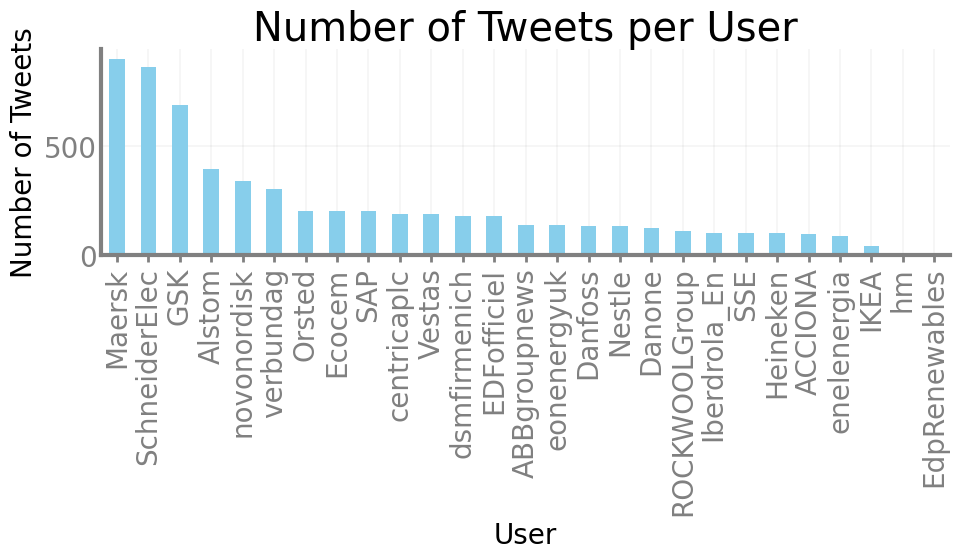

username
Maersk           902
SchneiderElec    866
GSK              688
Alstom           393
novonordisk      339
verbundag        302
Orsted           203
Ecocem           201
SAP              200
centricaplc      188
Vestas           187
dsmfirmenich     179
EDFofficiel      178
ABBgroupnews     138
eonenergyuk      137
Danfoss          133
Nestle           132
Danone           122
ROCKWOOLGroup    109
Iberdrola_En     101
SSE              100
Heineken         100
ACCIONA           95
enelenergia       88
IKEA              41
hm                 7
EdpRenewables      1
Name: count, dtype: int64


In [35]:
# Compute the number of total tweets per username/user_id
tweet_counts = df['username'].value_counts()

# Plot the results using a bar chart
plt.figure(figsize=(10, 6))
tweet_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets per User')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(tweet_counts)

In [17]:
len(df.username.unique())

27

In [18]:
df['created_at']

0       2023-01-03T15:18:41.000Z
1       2023-01-10T09:57:29.000Z
2       2023-01-11T10:01:06.000Z
3       2023-01-12T09:09:45.000Z
4       2023-01-13T09:41:43.000Z
                  ...           
6125    2023-12-13T16:03:45.000Z
6126    2023-12-19T15:32:30.000Z
6127    2023-12-20T15:13:16.000Z
6128    2023-12-22T11:16:00.000Z
6129    2023-12-27T20:31:45.000Z
Name: created_at, Length: 6130, dtype: object

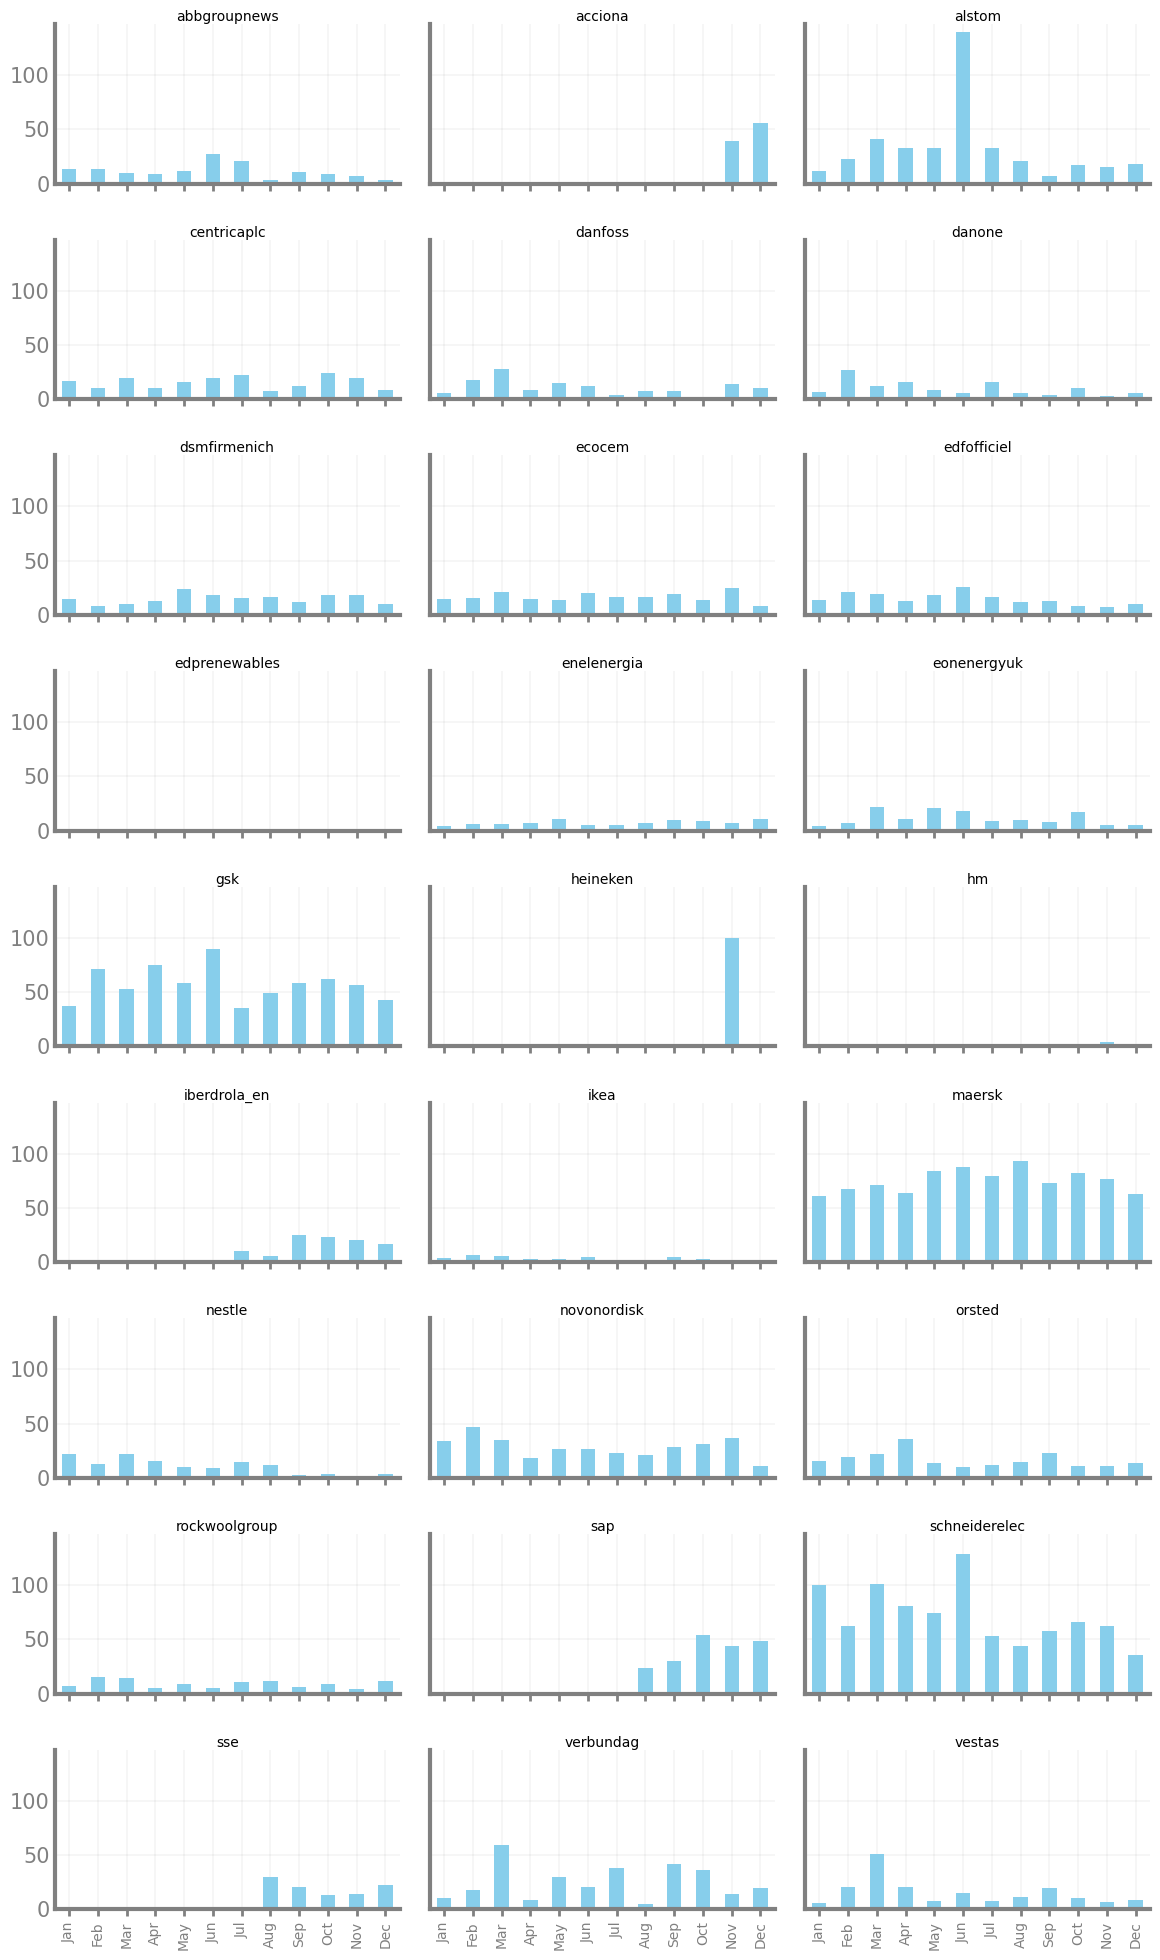

In [80]:
rcParams['figure.figsize'] = (30, 8)

# Convert 'created_at' column to datetime type
df['created_at'] = pd.to_datetime(df['created_at'])
df['day'] = df['created_at'].dt.date
df['day'].dtype
df_plot = df.groupby(['day', 'username']).size().reset_index().pivot(columns='username', index='day', values=0)


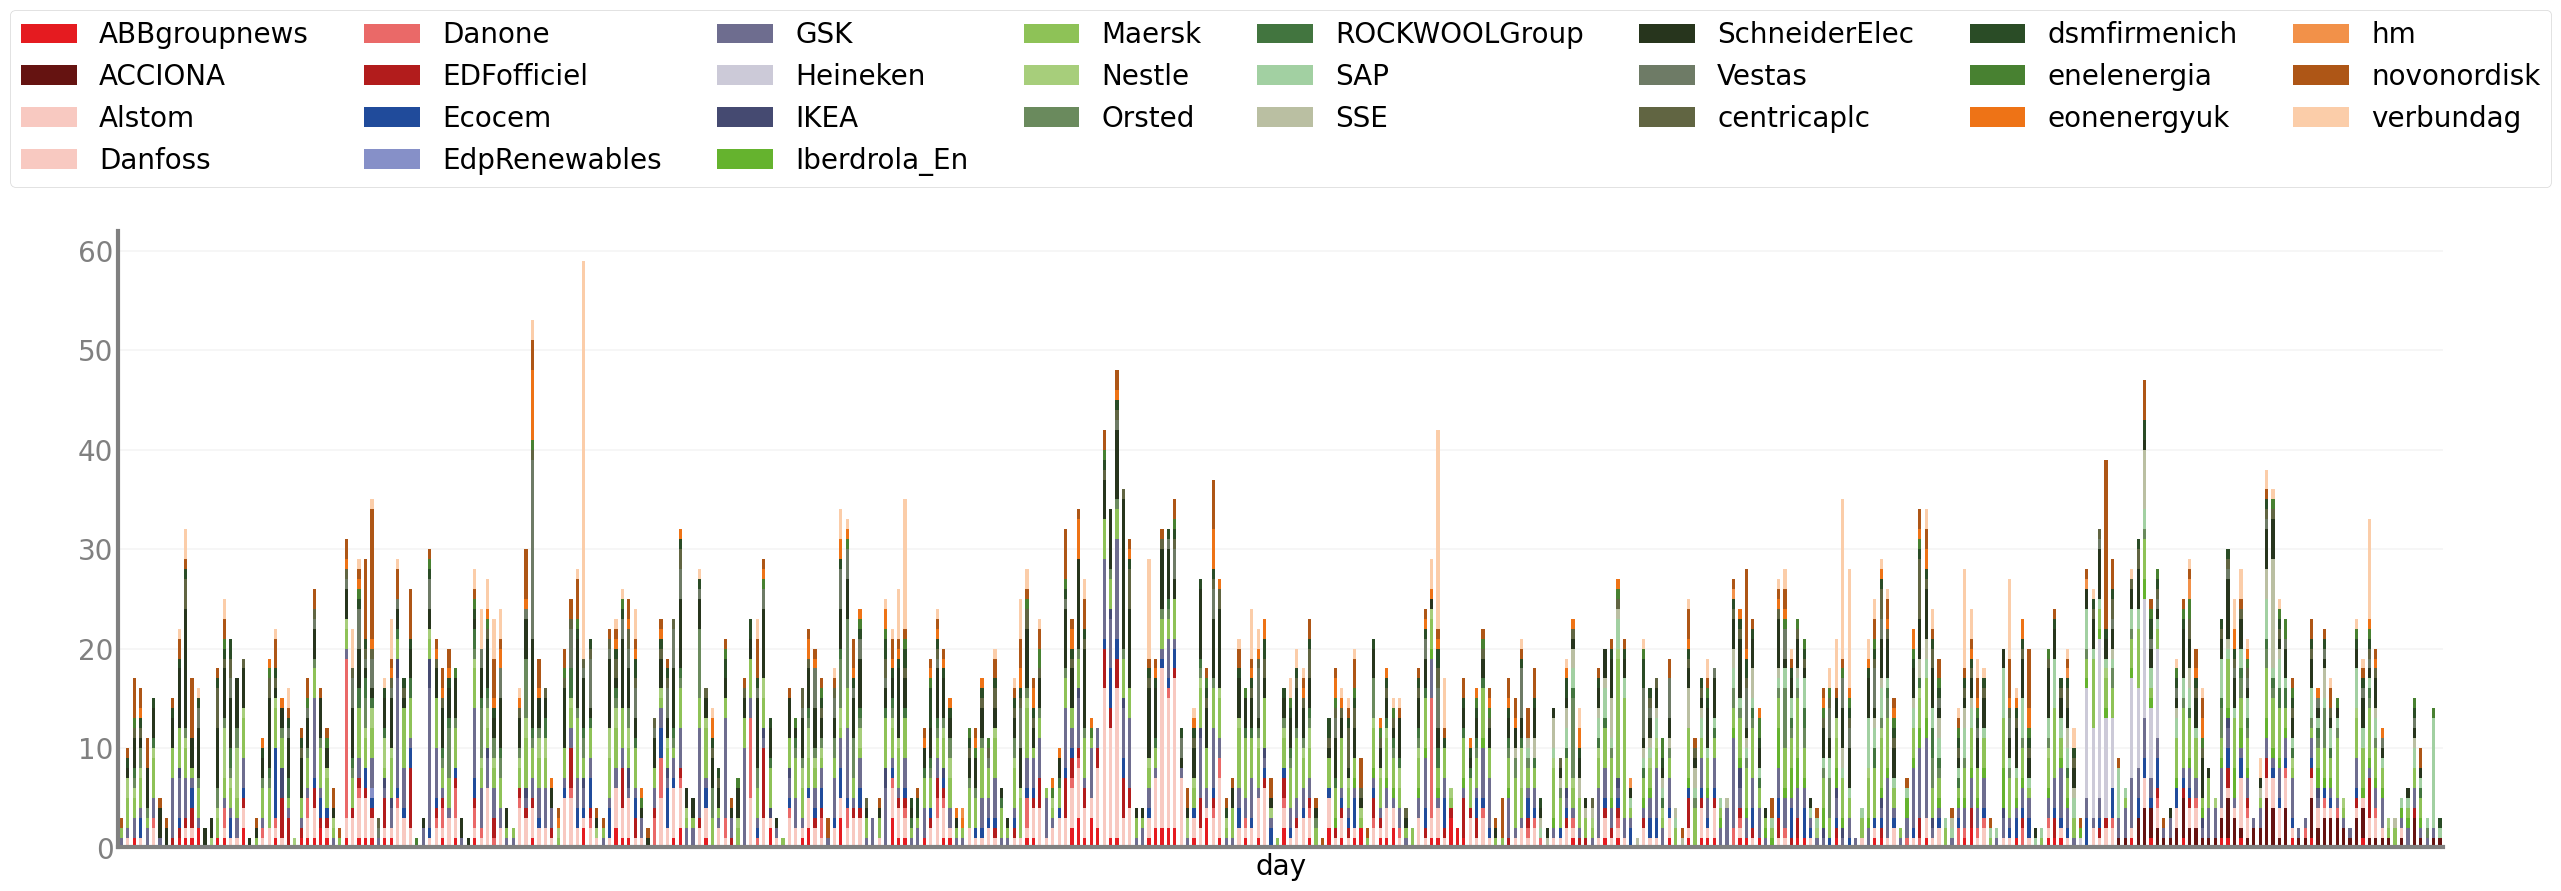

In [81]:
df_plot.plot(kind='bar', stacked=True)
plt.xticks(ticks=[], labels=[])
plt.legend(numpoints=1, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=8, markerscale=1)

In [82]:
df['week'] = df['created_at'].dt.isocalendar().week
df['week'].dtype
df_plot = df.groupby(['week', 'username']).size().reset_index().pivot(columns='username', index='week', values=0)

<Figure size 1500x1200 with 0 Axes>

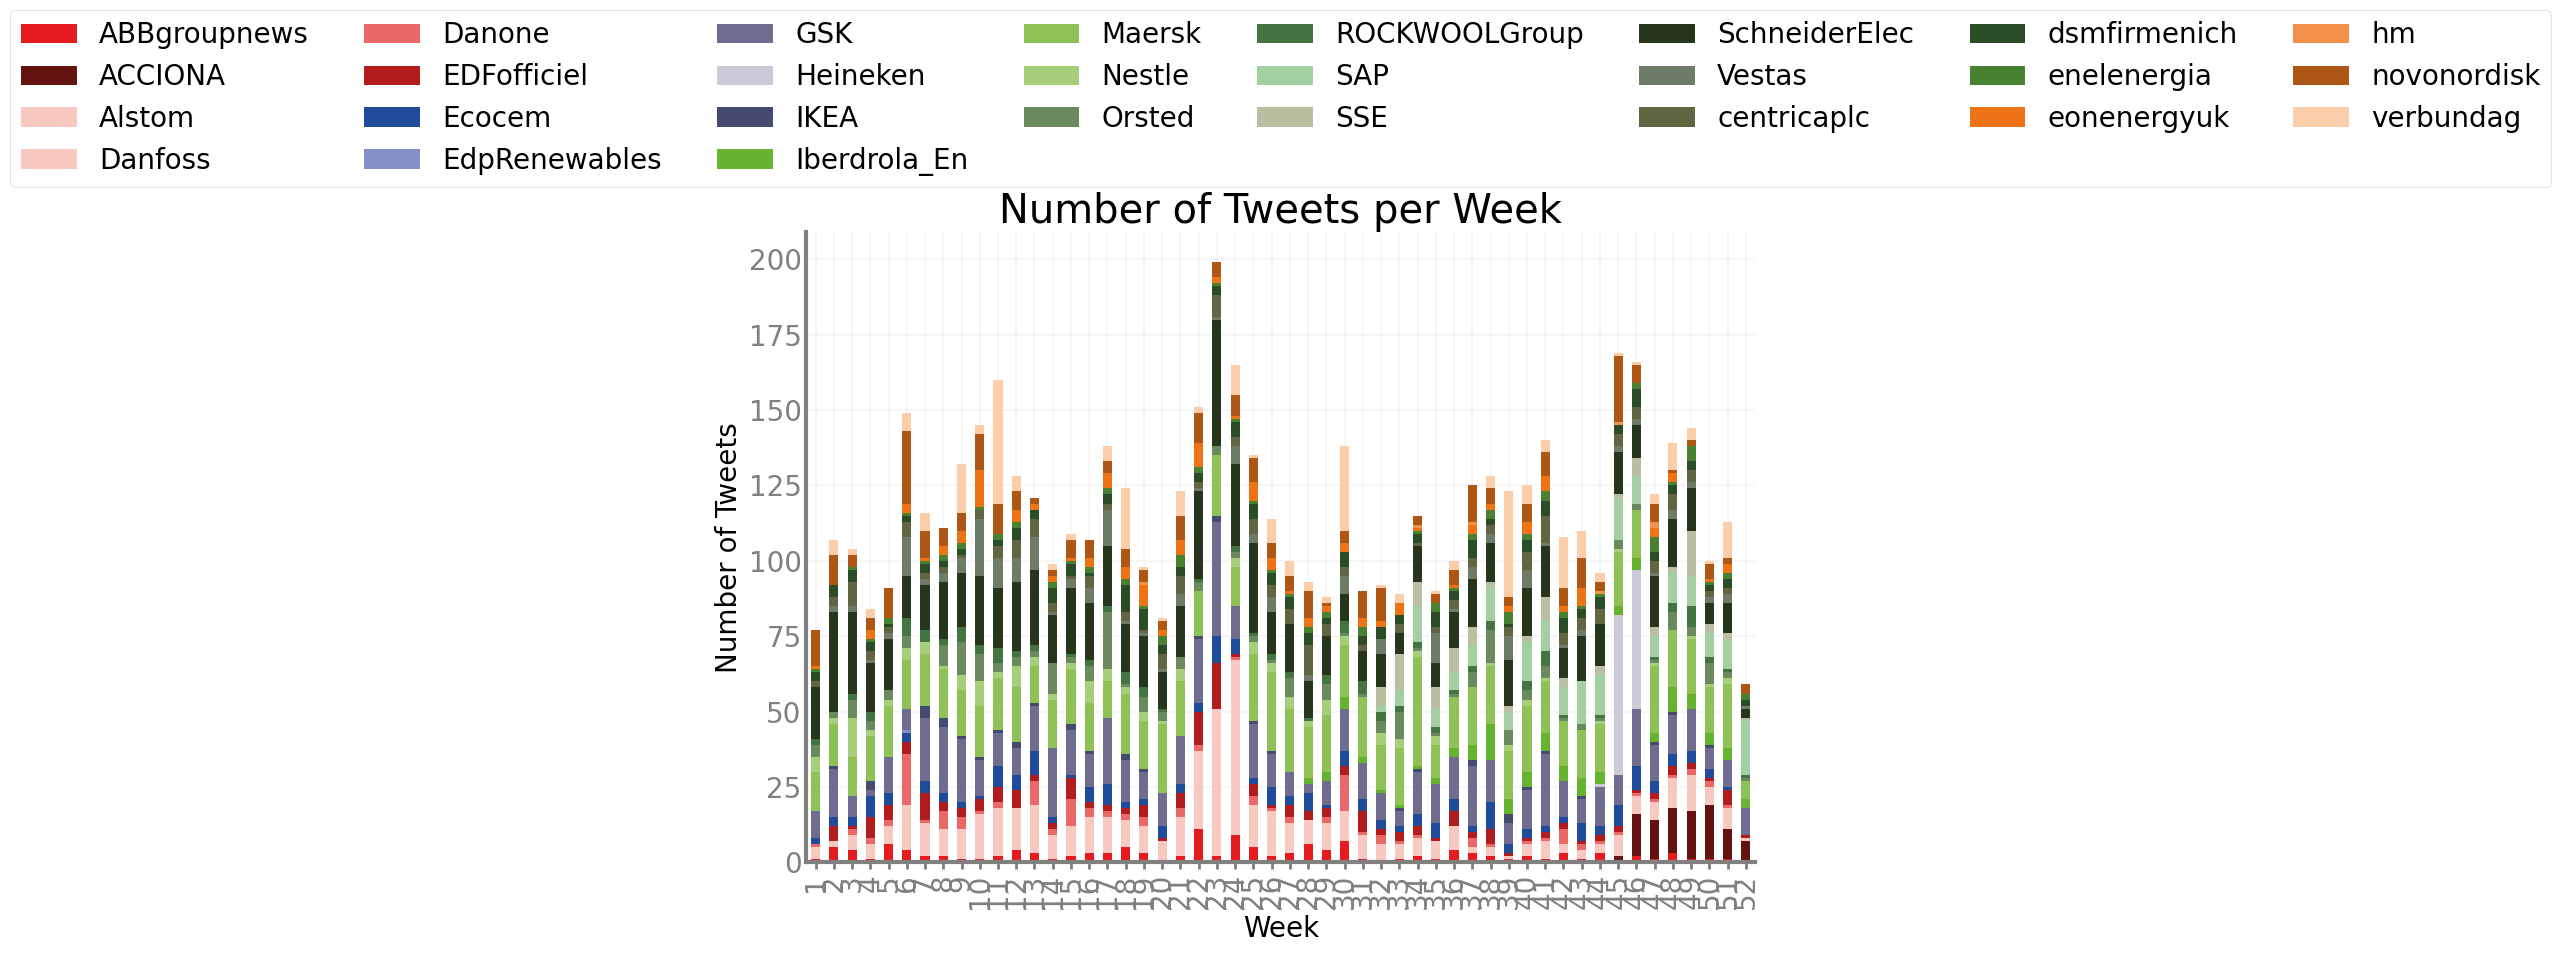

In [83]:
rcParams['figure.figsize'] = (20, 10)

# Plotting
plt.figure(figsize=(15, 12))

# Plot Number of Tweets per Day
df_plot.plot(kind='bar', stacked=True)
plt.title('Number of Tweets per Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.legend(numpoints=1, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=8, markerscale=0.5)
plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

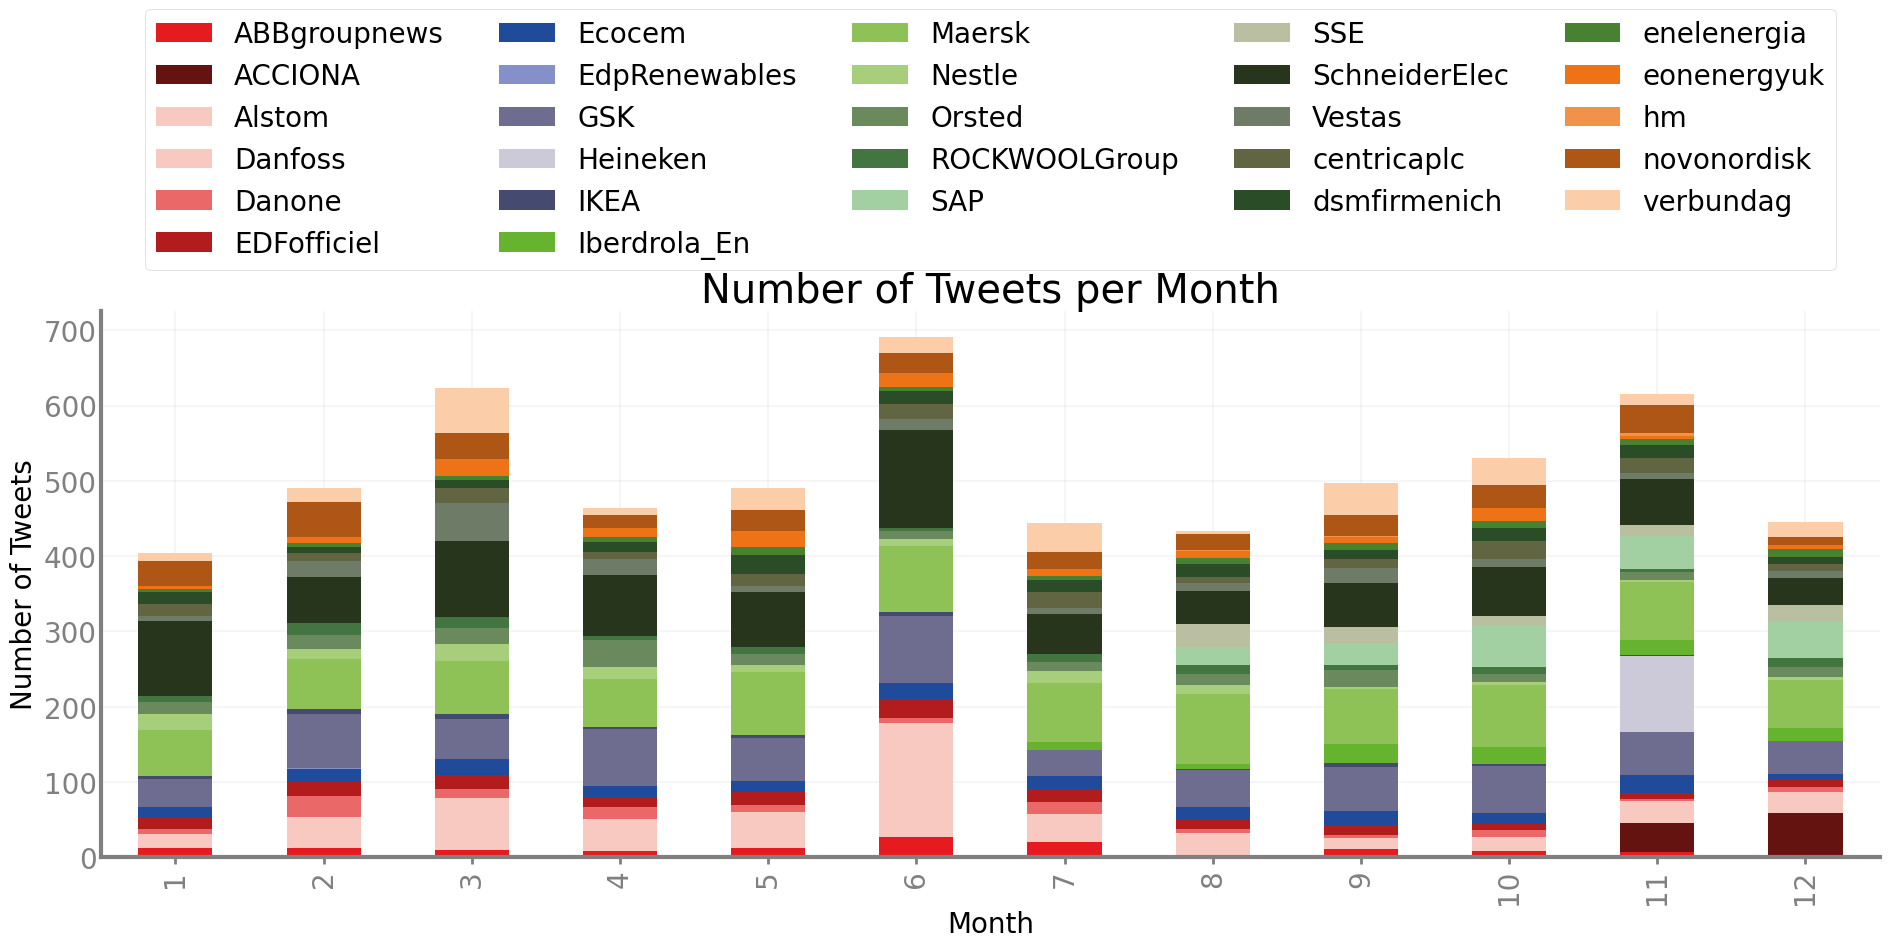

In [84]:
df['month'] = df['created_at'].dt.month
df['month'].dtype
df_plot = df.groupby(['month', 'username']).size().reset_index().pivot(columns='username', index='month', values=0)

# Plotting
plt.figure(figsize=(15, 12))

# Plot Number of Tweets per Day
df_plot.plot(kind='bar', stacked=True)
plt.title('Number of Tweets per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=5, markerscale=0.5)
plt.tight_layout()
plt.show()

### Tweet Frequency: Average number of tweets per day/hour/week.

In [116]:
# Compute tweet frequency per day
tweets_per_day = df.groupby(['username', 'day']).size().reset_index(name='tweets_per_day')
# Get total number of days
total_days = 365
# Adjust average tweets per day considering days with zero tweets
avg_tweets_per_day = (tweets_per_day.groupby('username')['tweets_per_day'].sum() / total_days).fillna(0).sort_values(ascending=False)


tweets_per_week = df.groupby(['username', 'week']).size().reset_index(name='tweets_per_week')
# Get total number of days
total_weeks = 52
# Adjust average tweets per day considering days with zero tweets
avg_tweets_per_week = (tweets_per_week.groupby('username')['tweets_per_week'].sum() / total_weeks).fillna(0).sort_values(ascending=False)

tweets_per_month = df.groupby(['username', 'month']).size().reset_index(name = 'tweets_per_month')
total_months = 12
# Adjust average tweets per day considering days with zero tweets
avg_tweets_per_month = (tweets_per_month.groupby('username')['tweets_per_month'].sum() / total_weeks).fillna(0).sort_values(ascending=False)

print("Average tweets per day:")
print(avg_tweets_per_day)

print("\nAverage tweets per week:")
print(avg_tweets_per_week)

print("\nAverage tweets per month:")
print(avg_tweets_per_month)

Average tweets per day:
username
Maersk           2.471233
SchneiderElec    2.372603
GSK              1.884932
Alstom           1.076712
novonordisk      0.928767
verbundag        0.827397
Orsted           0.556164
Ecocem           0.550685
SAP              0.547945
centricaplc      0.515068
Vestas           0.512329
dsmfirmenich     0.490411
EDFofficiel      0.487671
ABBgroupnews     0.378082
eonenergyuk      0.375342
Danfoss          0.364384
Nestle           0.361644
Danone           0.334247
ROCKWOOLGroup    0.298630
Iberdrola_En     0.276712
SSE              0.273973
Heineken         0.273973
ACCIONA          0.260274
enelenergia      0.241096
IKEA             0.112329
hm               0.019178
EdpRenewables    0.002740
Name: tweets_per_day, dtype: float64

Average tweets per week:
username
Maersk           17.346154
SchneiderElec    16.653846
GSK              13.230769
Alstom            7.557692
novonordisk       6.519231
verbundag         5.807692
Orsted            3.903846
Ecoc

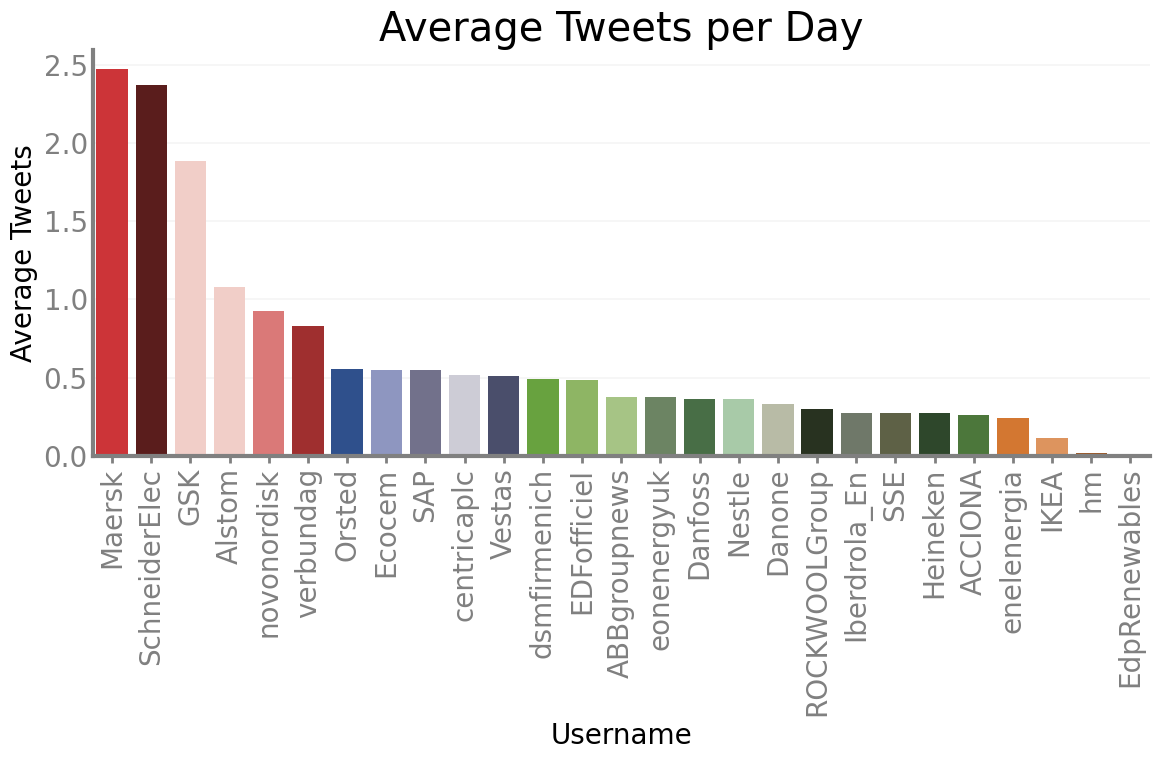

In [117]:
# Plotting
plt.figure(figsize=(12, 8))
# Plotting average tweets per day
sns.barplot(x=avg_tweets_per_day.index, y=avg_tweets_per_day.values)
plt.title('Average Tweets per Day')
plt.xlabel('Username')
plt.ylabel('Average Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

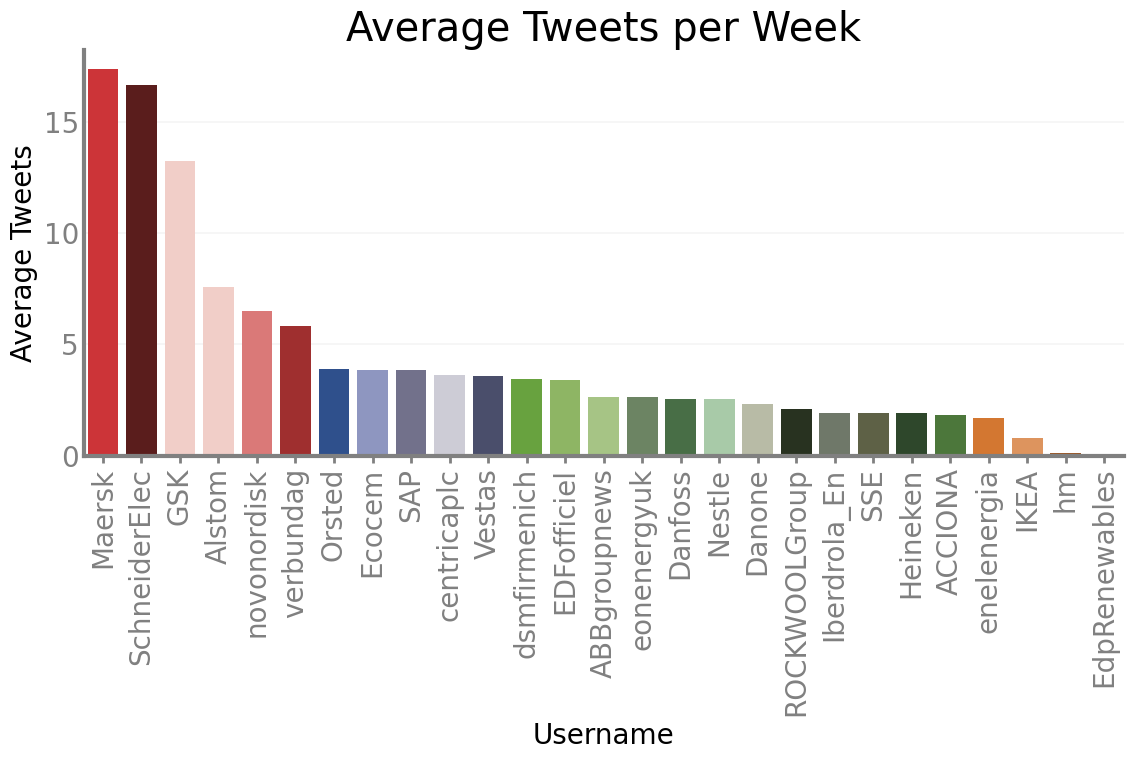

In [118]:
# Plotting
plt.figure(figsize=(12, 8))
# Plotting average tweets per day
sns.barplot(x=avg_tweets_per_week.index, y=avg_tweets_per_week.values)
plt.title('Average Tweets per Week')
plt.xlabel('Username')
plt.ylabel('Average Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

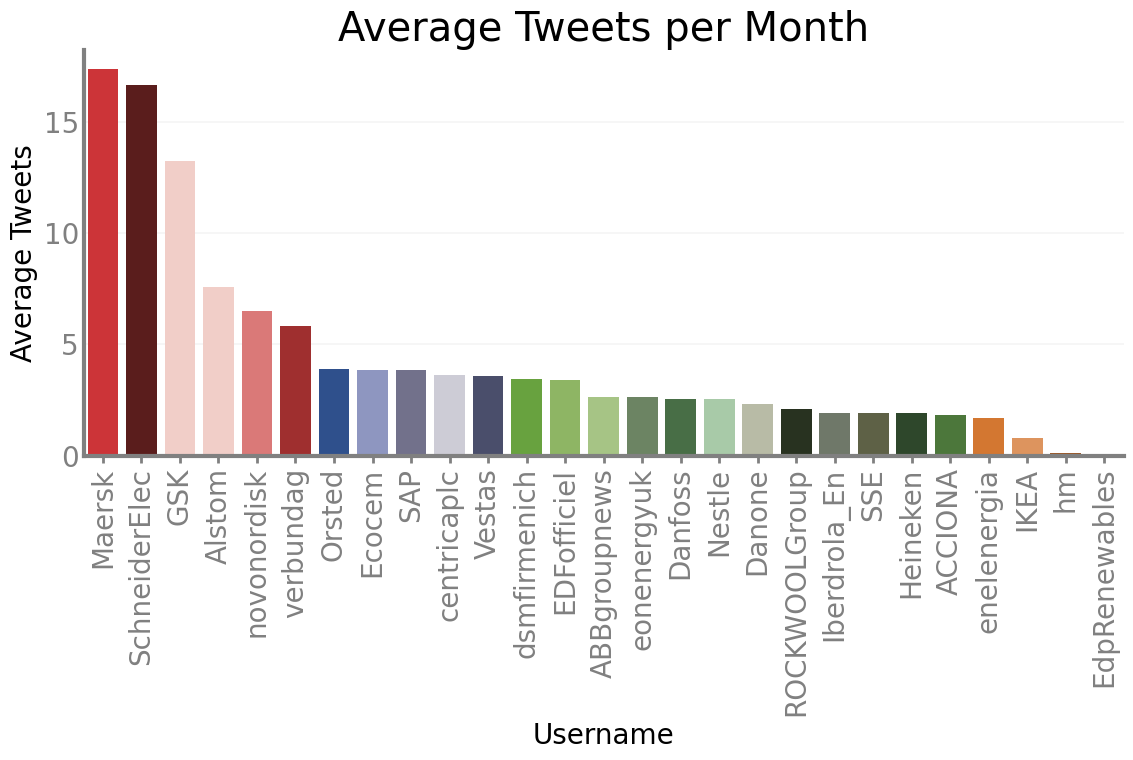

In [119]:
# Plotting
plt.figure(figsize=(12, 8))
# Plotting average tweets per day
sns.barplot(x=avg_tweets_per_month.index, y=avg_tweets_per_month.values)
plt.title('Average Tweets per Month')
plt.xlabel('Username')
plt.ylabel('Average Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [123]:
df.columns

Index(['author_id', 'created_at', 'edit_history_tweet_ids', 'id', 'lang',
       'text', 'username', 'geo', 'attachments_media_keys',
       'entities_annotations', 'entities_hashtags', 'entities_urls',
       'public_metrics_bookmark_count', 'public_metrics_impression_count',
       'public_metrics_like_count', 'public_metrics_quote_count',
       'public_metrics_reply_count', 'public_metrics_retweet_count',
       'entities_mentions', 'attachments_poll_ids', 'entities_cashtags',
       'attachments_media_source_tweet_id', 'annotations_end',
       'annotations_normalized_text', 'annotations_probability',
       'annotations_start', 'annotations_type', 'urls_description',
       'urls_display_url', 'urls_end', 'urls_expanded_url', 'urls_start',
       'urls_status', 'urls_title', 'urls_unwound_url', 'urls_url',
       'urls_media_key', 'day', 'week', 'month'],
      dtype='object')

### Engagement Rate: Ratio of likes, retweets, and replies to the total number of tweets.

In [130]:
# Assuming your dataframe is named df
# First, let's calculate the total number of tweets and total likes for each username
# tweets_count = df.groupby('username')['id'].count()
impression_count = df.groupby('username')['public_metrics_impression_count'].sum()

# Then, compute the engagement rate
engagement_count = impression_count
# Create a new dataframe to store the results
engagement_df = pd.DataFrame({'username': engagement_count.index, 'engagement_count': engagement_count.values})

# Display the dataframe sorted by engagement rate
engagement_df = engagement_df.sort_values(by='engagement_count', ascending=False)
print(engagement_df)

         username  engagement_count
19         Vestas            6198.0
0    ABBgroupnews               0.0
14         Orsted               0.0
25    novonordisk               0.0
24             hm               0.0
23    eonenergyuk               0.0
22    enelenergia               0.0
21   dsmfirmenich               0.0
20    centricaplc               0.0
18  SchneiderElec               0.0
17            SSE               0.0
16            SAP               0.0
15  ROCKWOOLGroup               0.0
13         Nestle               0.0
1         ACCIONA               0.0
12         Maersk               0.0
11   Iberdrola_En               0.0
10           IKEA               0.0
9        Heineken               0.0
8             GSK               0.0
7   EdpRenewables               0.0
6          Ecocem               0.0
5     EDFofficiel               0.0
4          Danone               0.0
3         Danfoss               0.0
2          Alstom               0.0
26      verbundag           

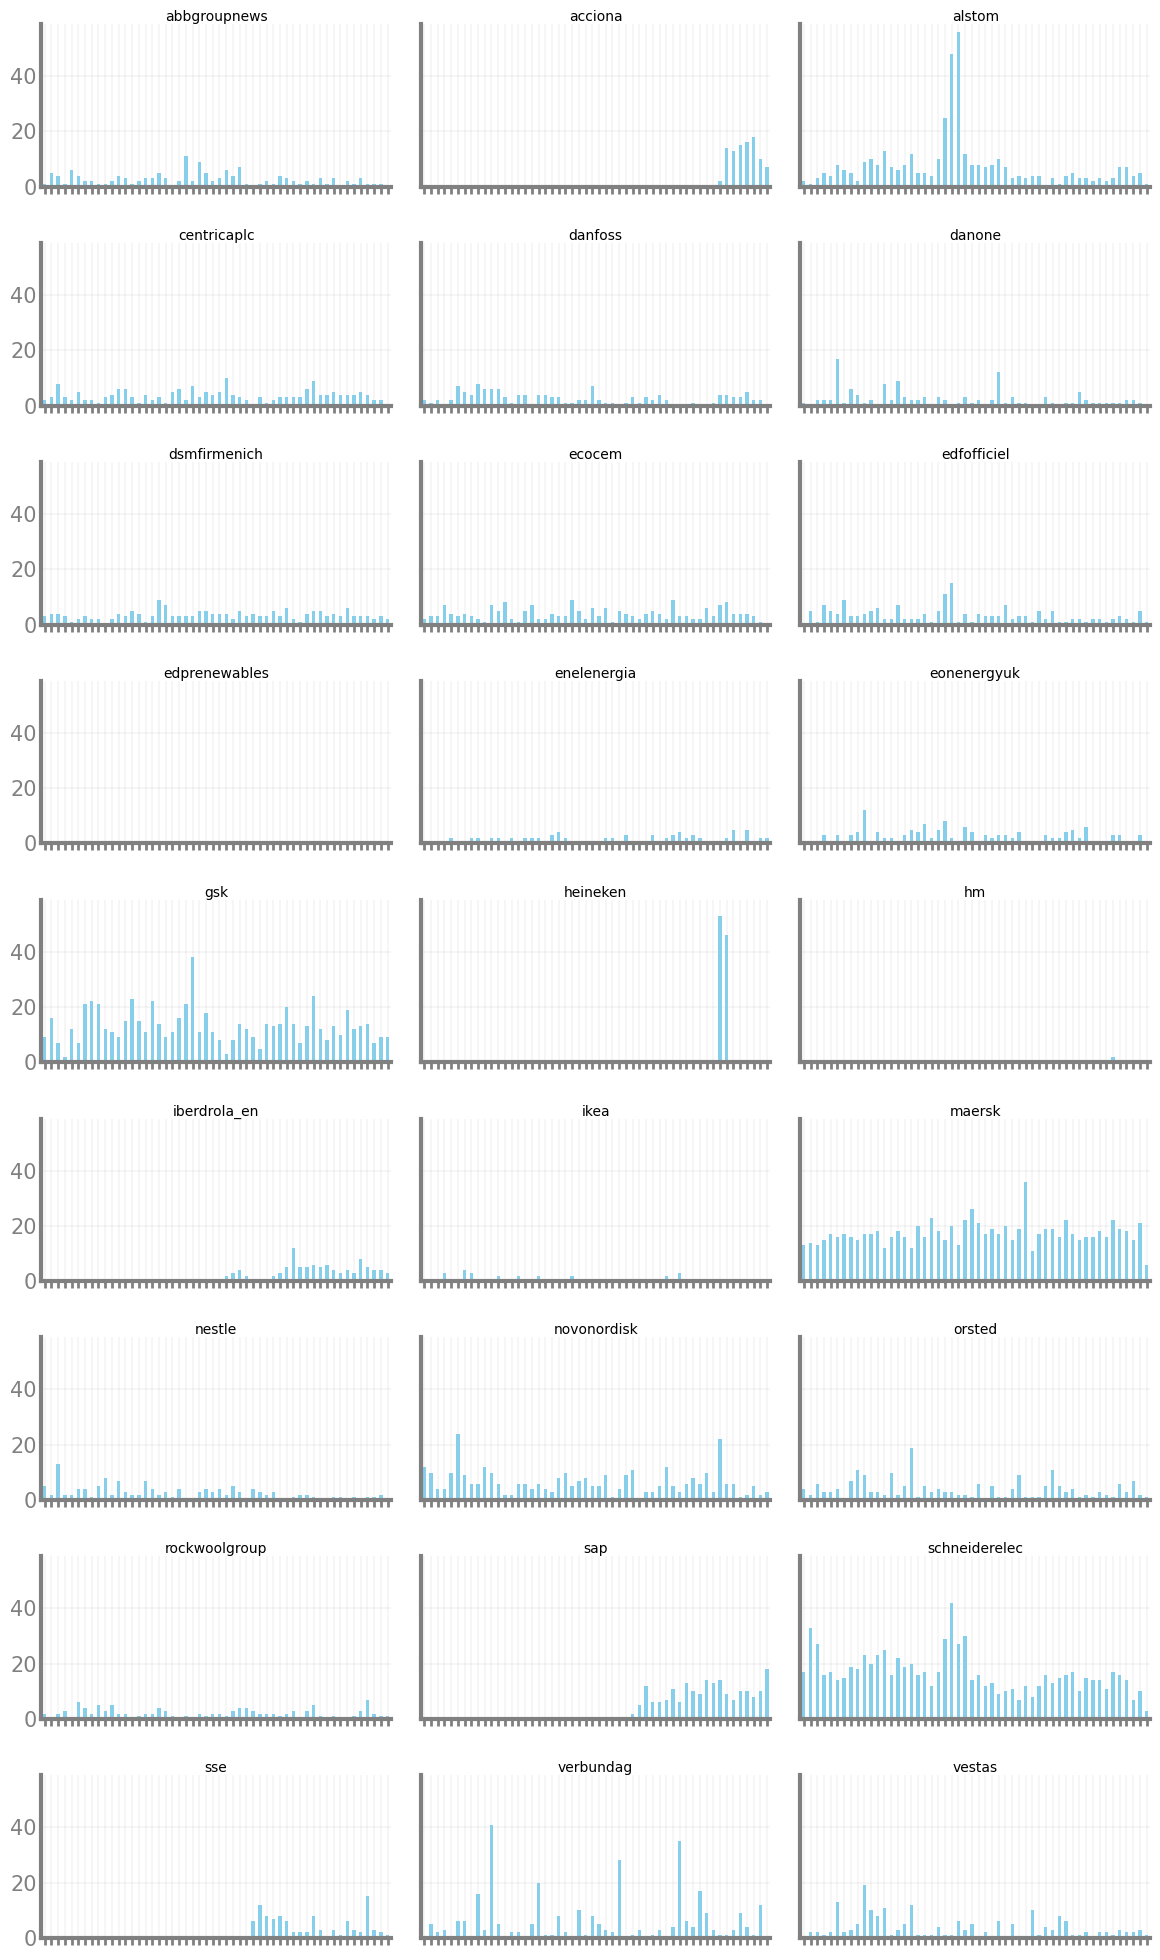

In [19]:
# Convert 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract month from 'created_at' column
df['week'] = df['created_at'].dt.isocalendar().week

# Group by 'username' and 'month' and count the tweets
tweets_per_week = df.groupby(['username', 'week']).size()

# Calculate the total number of tweets per user
# total_tweets_per_user = tweets_per_week.sum(axis=1)

# Calculate the relative frequency of tweets per month for each user
# relative_frequency = tweets_per_week.div(total_tweets_per_user, axis=0)

# Plotting
fig, axes = plt.subplots(nrows=len(tweets_per_week) // 3 + len(tweets_per_week) % 3, ncols=3, figsize=(12, 20), sharex=True, sharey=True)

for (username, relative_freq), ax in zip(tweets_per_week.iterrows(), axes.flatten()):
    relative_freq.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(username, pad=-5, fontsize=10)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xticklabels([])

# Set xticklabels only for the bottom plots in each column
# for ax in axes[-1]:
    # ax.set_xticklabels([pd.Timestamp(2023, m, 1).strftime('%b') for m in range(1, 13)], fontsize=10)

plt.tight_layout()
plt.show()


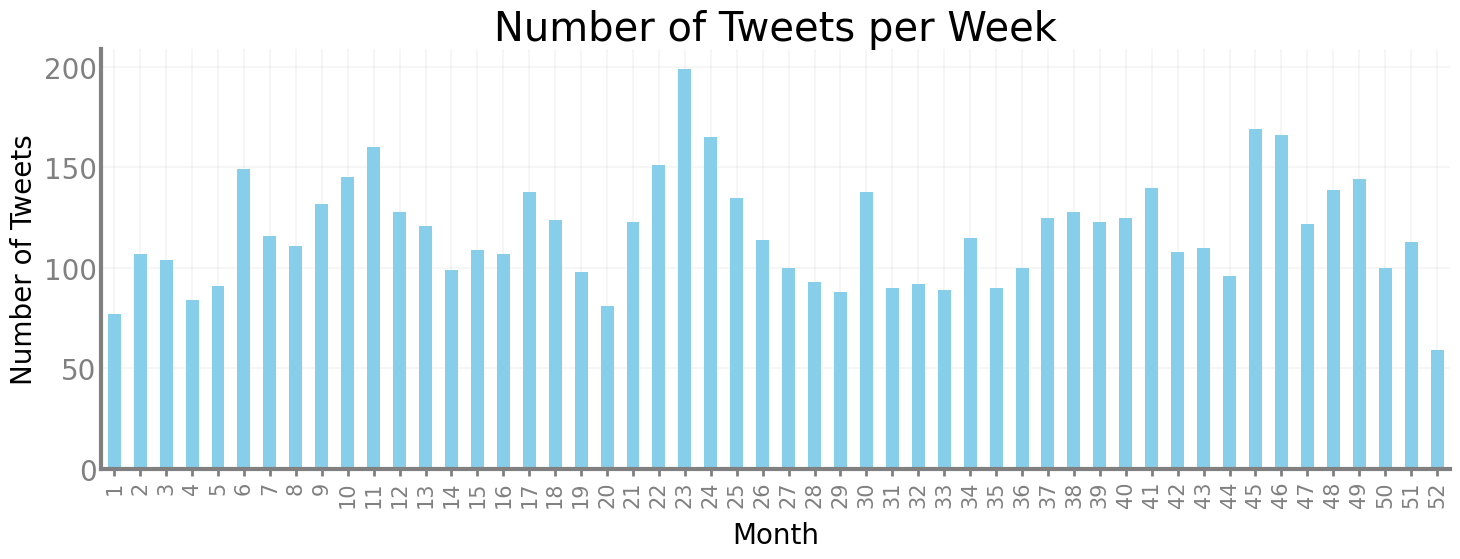

In [96]:
tweet_counts = df['week'].value_counts().sort_index()

# Plot the results using a bar chart
plt.figure(figsize=(15, 6))
tweet_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets per Week')
plt.xlabel('Month', labelpad=10)
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90, ticks=[i for i in range(52)], fontsize=15)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()